# Stock Exchange Data Analysis

In [2]:
import matplotlib.pyplot as plt
import pandas
import seaborn
from sklearn.model_selection import train_test_split

# Load the stock data.
data = pandas.read_csv("data/index_processed.csv")


In [16]:
# Split the data set by 'Index' column.
data_frames_per_index = {
    key: data.loc[value] for key, value in data.groupby("Index").groups.items()
}
# Generate a training and test data set for each index.
train_test_per_index = {}
for key, value in data_frames_per_index.items():
    training_data, test_data = train_test_split(value, train_size=0.8)
    train_test_per_index[key] = [training_data, test_data]
print(train_test_per_index.keys())
print("NYA Training Data:")
print(train_test_per_index["NYA"][0][["Index", "Date", "Adj Close"]].tail())
print("\nNYA Test Data:")
print(train_test_per_index["NYA"][1][["Index", "Date", "Adj Close"]].tail())


dict_keys(['000001.SS', '399001.SZ', 'GDAXI', 'GSPTSE', 'HSI', 'IXIC', 'J203.JO', 'N100', 'N225', 'NSEI', 'NYA', 'SSMI', 'TWII'])
NYA Training Data:
      Index        Date    Adj Close
11257   NYA  1977-01-26   589.489990
15936   NYA  1995-08-01  3175.080078
20242   NYA  2012-09-05  7992.009766
20225   NYA  2012-08-10  8044.759766
13467   NYA  1985-10-24  1151.270020

NYA Test Data:
      Index        Date    Adj Close
20425   NYA  2013-05-31  9302.269531
17626   NYA  2002-04-18  6269.689941
13993   NYA  1987-11-23  1439.400024
10885   NYA  1975-08-07   487.450012
17868   NYA  2003-04-03  4870.290039


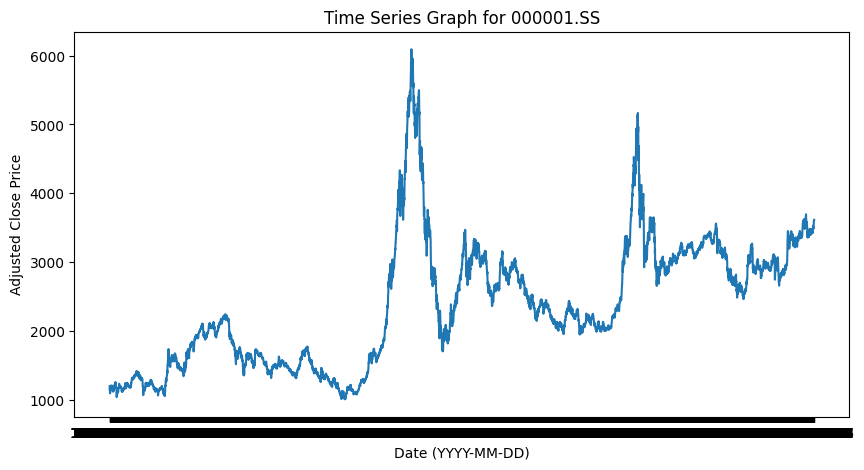

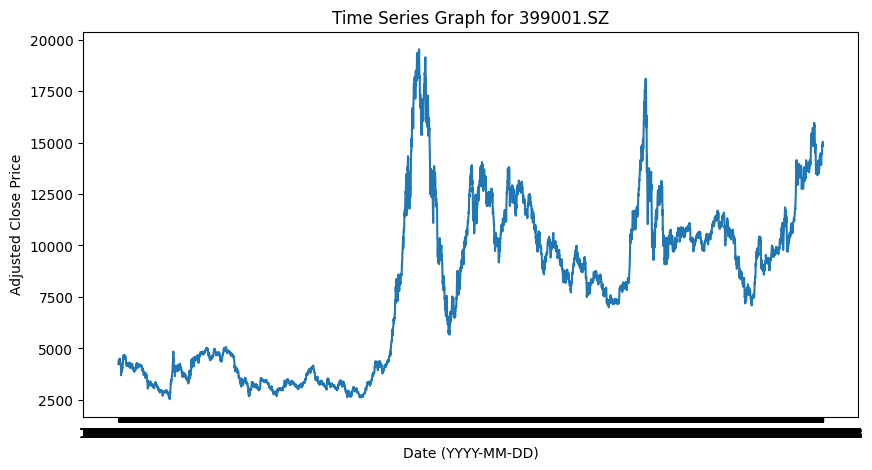

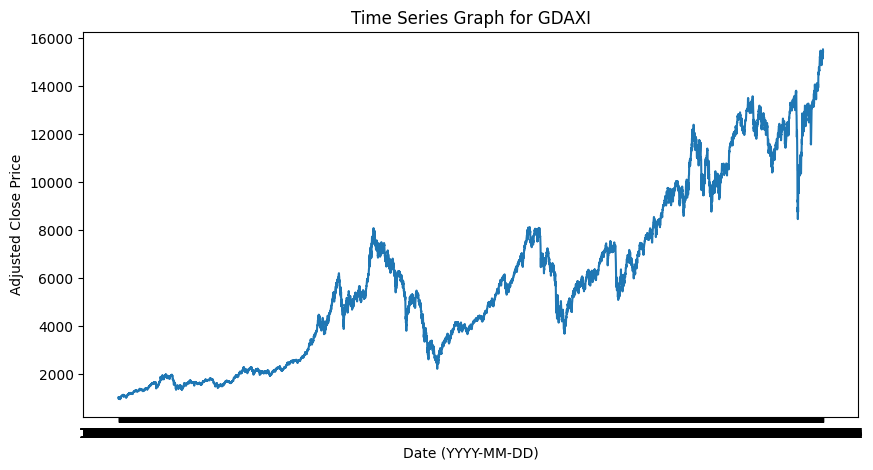

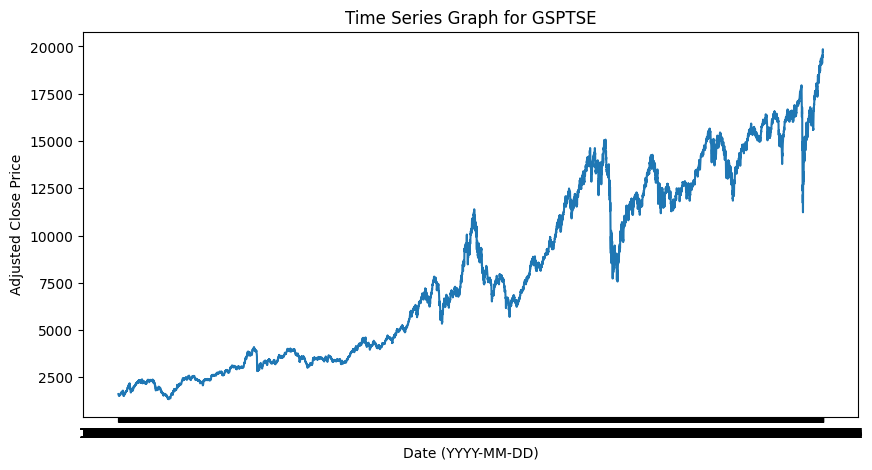

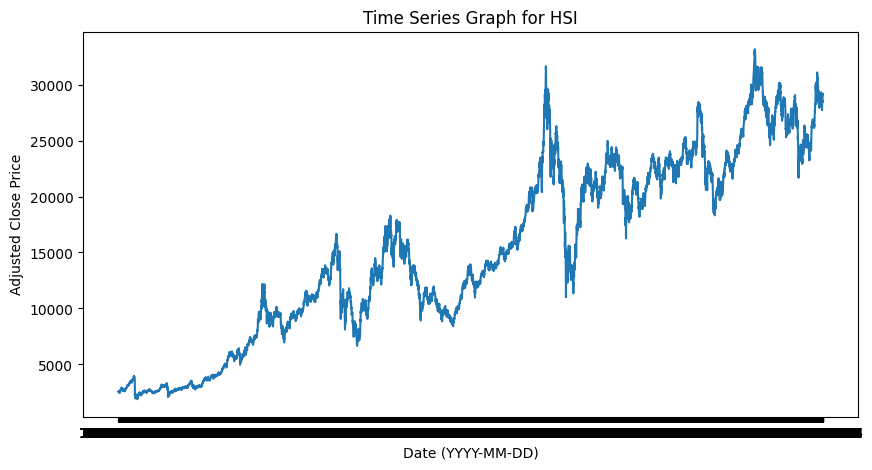

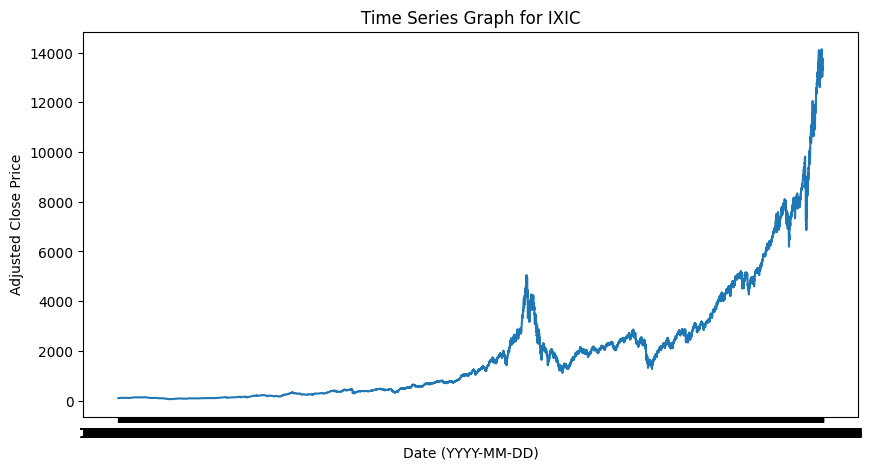

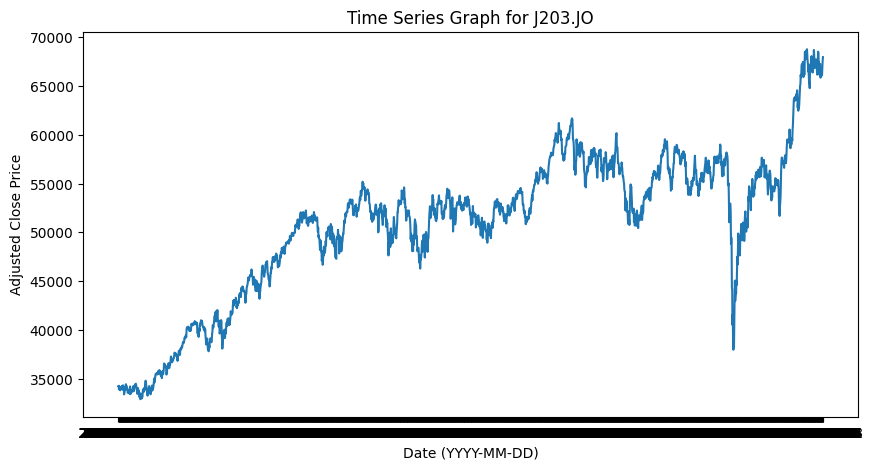

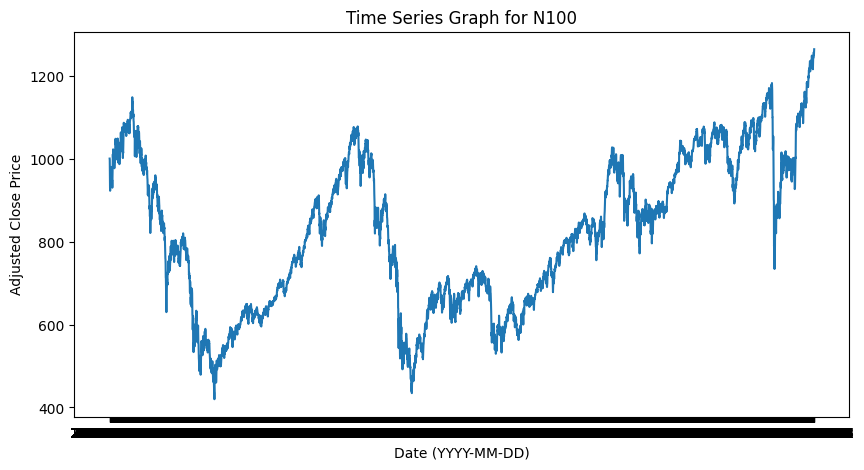

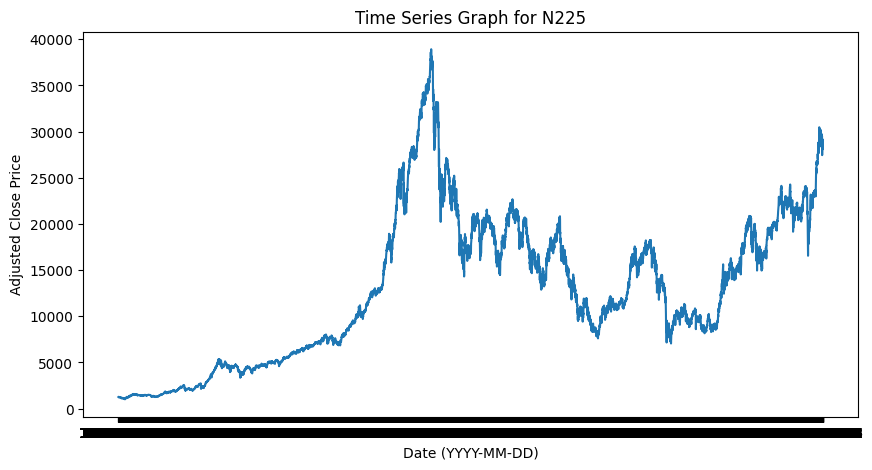

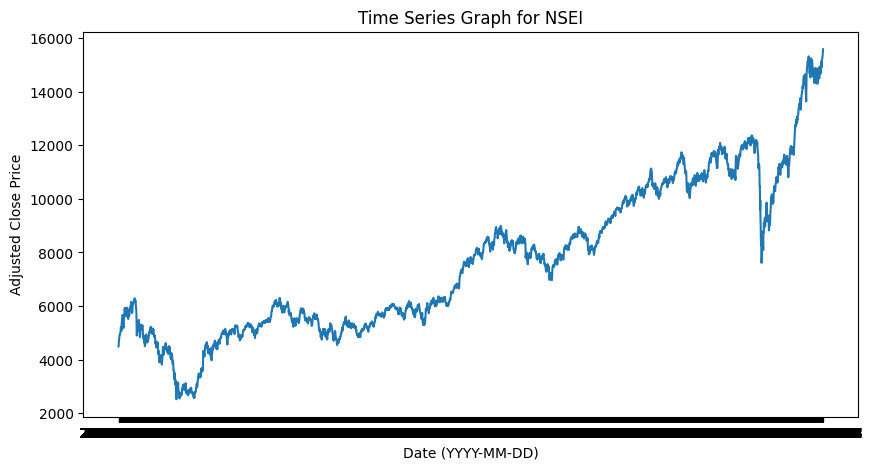

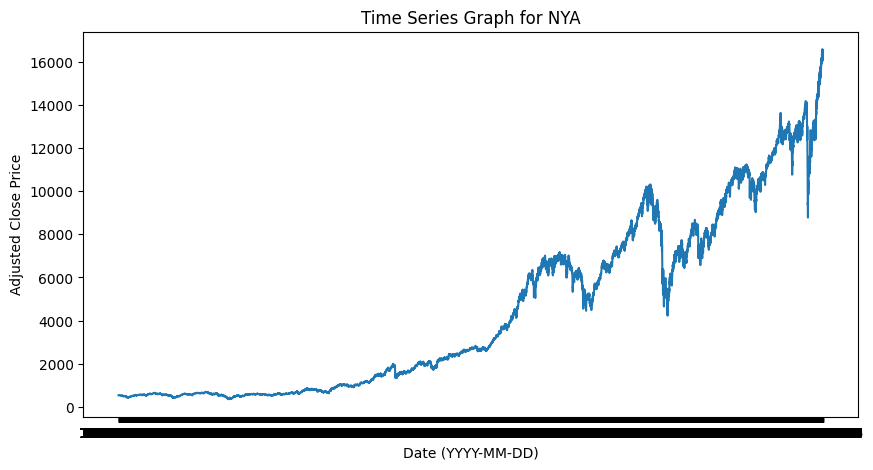

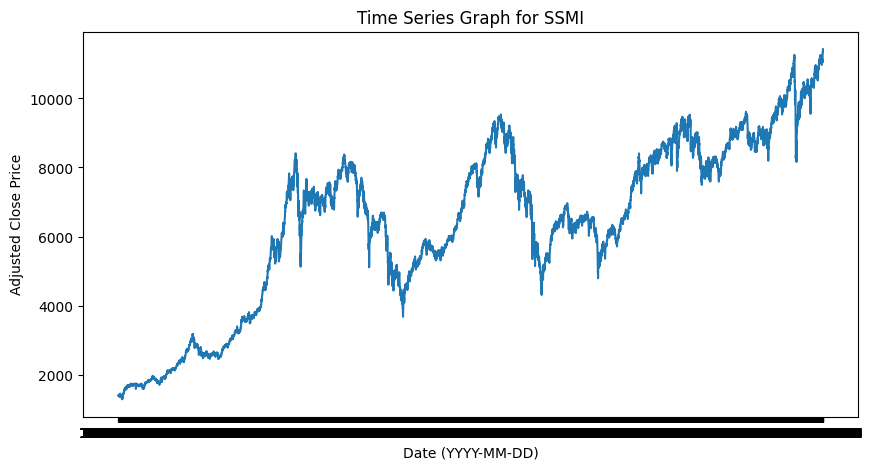

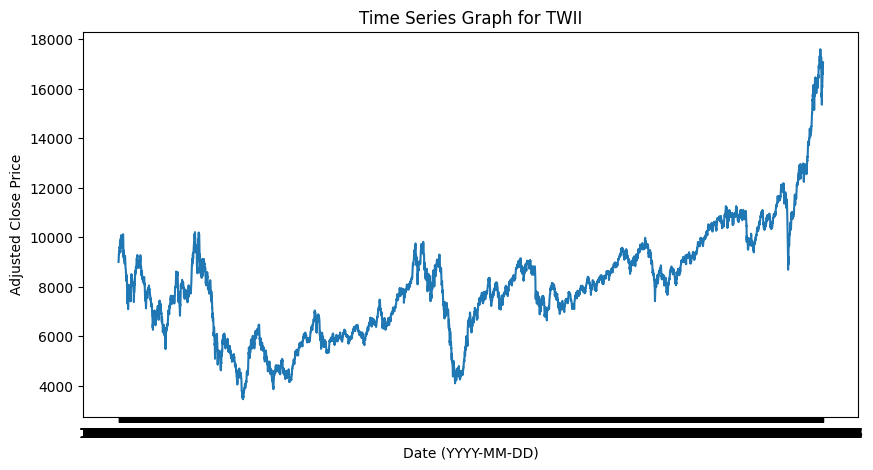

In [4]:
# Generate a time series graph for each index.
for index in train_test_per_index.keys():
    index_data = data.loc[data["Index"] == index]
    plt.subplots(figsize=(10, 5))
    axis = seaborn.lineplot(x="Date", y="Adj Close", data=index_data)
    axis.set_title(f"Time Series Graph for {index}")
    axis.set(xlabel="Date (YYYY-MM-DD)", ylabel="Adjusted Close Price")
plt.show()


In [ ]:
# Perform moving average to reduce noise in the graph for NYA.
